## Assignment 4

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### 1. Data Inspection and Cleaning:
Data Inspection and Cleaning involves examining the dataset to understand its structure, quality, and potential issues, followed by correcting or removing inaccurate records to improve data quality. 

In [2]:
hotel_data = pd.read_csv("hotel_bookings.csv")

In [3]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


###### Check for missing values and handle them appropriately (e.g., imputation,dropping rows/columns).

In [4]:
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

In [5]:
drop_columns=['adults','children','market_segment','distribution_channel','reserved_room_type','assigned_room_type','reservation_status']

In [6]:
hotel_data = hotel_data.dropna(subset=drop_columns)
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3.0,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [7]:
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              507
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                          21
agent                              16338
company         

In [8]:
columns = ['country','deposit_type','customer_type']
for col in columns:
    hotel_data[col].fillna(hotel_data[col].mode()[0], inplace=True)

In [9]:
hotel_data['agent'].fillna(0, inplace=True)
hotel_data['company'].fillna(0, inplace=True)

In [10]:
hotel_data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

###### Check for duplicates and remove them if necessary.

In [11]:
duplicate_rows = hotel_data[hotel_data.duplicated()]
duplicate_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,03/07/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2.0,...,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,07/07/2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2.0,...,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,07/07/2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2.0,...,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,01/07/2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1.0,...,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,08/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2.0,...,No Deposit,9.0,0.0,0,Transient,126.00,0,2,Check-Out,03/09/2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3.0,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3.0,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3.0,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,03/09/2017


In [12]:
hotel_data = hotel_data.drop_duplicates()

In [13]:
duplicate_rows = hotel_data[hotel_data.duplicated()]
duplicate_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


###### Identify and handle outliers, if any.

In [14]:
def identify_outliers(hotel_data, column):
    Q1 = hotel_data[column].quantile(0.25)
    Q3 = hotel_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return hotel_data[(hotel_data[column] < lower_bound) | (hotel_data[column] > upper_bound)]

In [15]:
outliers= identify_outliers(hotel_data, 'adults')
outliers

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,02/07/2015
20,Resort Hotel,0,37,2015,July,27,1,1,4,1.0,...,No Deposit,241.0,0.0,0,Transient,97.29,0,1,Check-Out,06/07/2015
30,Resort Hotel,0,118,2015,July,27,1,4,10,1.0,...,No Deposit,0.0,0.0,0,Transient,62.00,0,2,Check-Out,15/07/2015
34,Resort Hotel,1,45,2015,July,27,2,1,3,3.0,...,No Deposit,241.0,0.0,0,Transient,108.80,0,1,Canceled,19/05/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119370,City Hotel,0,201,2017,August,35,30,1,4,1.0,...,No Deposit,9.0,0.0,0,Transient,108.00,0,2,Check-Out,04/09/2017
119372,City Hotel,0,175,2017,August,35,31,1,3,1.0,...,No Deposit,42.0,0.0,0,Transient,82.35,0,1,Check-Out,04/09/2017
119376,City Hotel,0,165,2017,August,35,29,1,5,3.0,...,No Deposit,9.0,0.0,0,Transient,209.25,0,3,Check-Out,04/09/2017
119382,City Hotel,0,135,2017,August,35,30,2,4,3.0,...,No Deposit,7.0,0.0,0,Transient,209.00,0,0,Check-Out,05/09/2017


In [16]:
def remove_outliers(heart_data, column):
    Q1 = heart_data[column].quantile(0.25)
    Q3 = heart_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return heart_data[(heart_data[column] >= lower_bound) & (heart_data[column] <= upper_bound)]

In [17]:
data_cleaned = remove_outliers(hotel_data, 'adults')
data_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,01/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,03/07/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2.0,...,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,03/07/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2.0,...,No Deposit,303.0,0.0,0,Transient,103.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2017,August,35,30,2,5,2.0,...,No Deposit,394.0,0.0,0,Transient,96.14,0,2,Check-Out,06/09/2017
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,06/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,07/09/2017


###### Check for inconsistencies in the data (e.g., invalid values, typos).

In [18]:
check_valid={'reserved_room_type': lambda x: x.isalpha()}
invalid_values = {}

In [19]:
for col, criteria_func in check_valid.items():
    invalid_rows = hotel_data[~hotel_data[col].apply(criteria_func)]
    if not invalid_rows.empty:
        invalid_values[col] = invalid_rows

In [20]:
if invalid_values:
    for column, invalid_rows in invalid_values.items():
        print(f"Invalid values in column '{column}':")
        print(invalid_rows)
else:
    print("No invalid values")

No invalid values


### 2. Descriptive Statistics:
Descriptive Statistics involves summarizing and organizing data to understand its basic features and distribution.

Calculate summary statistics (mean, median, mode, standard deviation, etc.) for numerical columns like lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, previous_bookings_not_canceled, days_in_waiting_list, adr,required_car_parking_spaces, and total_of_special_requests.

In [21]:
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr','required_car_parking_spaces', 'total_of_special_requests']

In [22]:
summary = hotel_data[numerical_columns].describe()
summary

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,79.919995,1.005288,2.625489,1.875884,0.138652,0.010828,0.030422,0.184045,0.754263,106.345264,0.084239,0.698581
std,86.071919,1.031931,2.053477,0.626496,0.455915,0.113613,0.369200,1.732148,10.103843,55.002500,0.281555,0.831960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,49.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,125.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,391.000000,5400.000000,8.000000,5.000000


In [23]:
mode = hotel_data[numerical_columns].mode()
mode

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,1,2.0,0.0,0,0,0,0,0.0,0,0


Display value counts and frequencies for categorical columns like hotel, country, market_segment, distribution_channel, is_repeated_guest, reserved_room_type, assigned_room_type, deposit_type, agent, company, customer_type, reservation_status.

In [24]:
categorical_columns = ['hotel', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']

In [25]:
for col in categorical_columns:
    print(f"Value counts and frequencies for {col}:")
    value_counts = hotel_data[col].value_counts()
    frequencies = value_counts / len(hotel_data[col])
    print(pd.DataFrame({'Counts': value_counts, 'Frequencies': frequencies}))
    print("\n")

Value counts and frequencies for hotel:
              Counts  Frequencies
hotel                            
City Hotel     53428     0.611514
Resort Hotel   33942     0.388486


Value counts and frequencies for country:
         Counts  Frequencies
country                     
PRT       27880     0.319103
GBR       10433     0.119412
FRA        8837     0.101145
ESP        7252     0.083003
DEU        5387     0.061657
...         ...          ...
MMR           1     0.000011
BFA           1     0.000011
CYM           1     0.000011
MLI           1     0.000011
KHM           1     0.000011

[177 rows x 2 columns]


Value counts and frequencies for market_segment:
                Counts  Frequencies
market_segment                     
Online TA        51613     0.590741
Offline TA/TO    13882     0.158887
Direct           11797     0.135023
Groups            4943     0.056575
Corporate         4206     0.048140
Complementary      702     0.008035
Aviation           227     0.002598


Va

### 3. Data Visualization:
Data Visualization involves creating visual representations of data to uncover patterns, trends, and insights. 

###### Create histograms or box plots for numerical columns to visualize the distribution and identify potential outliers.

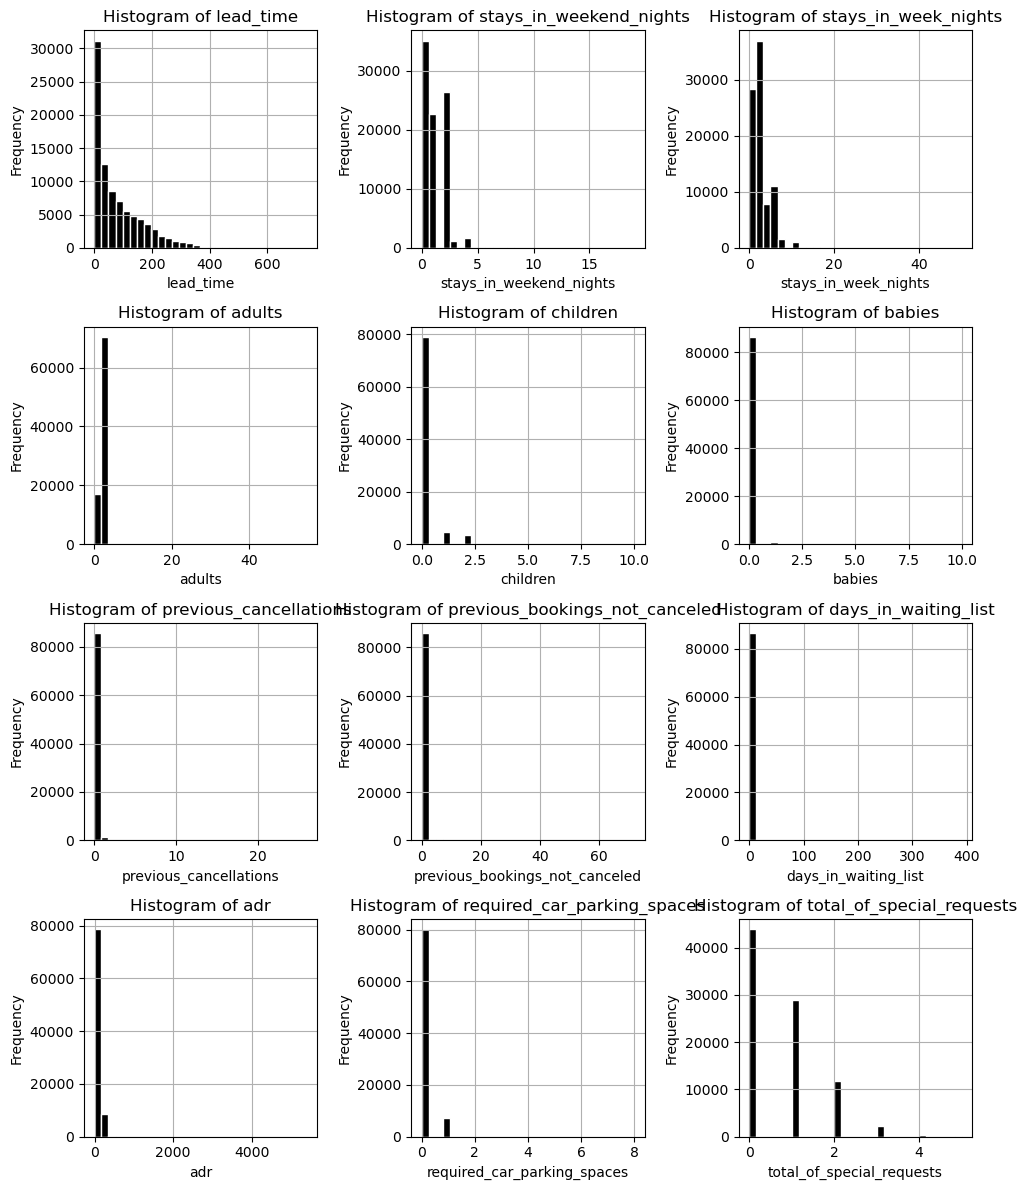

In [26]:
plt.figure(figsize=(10, 12))
for i in range(len(numerical_columns)):
    plt.subplot(4, 3, i+1)
    plt.hist(hotel_data[numerical_columns[i]], bins=30, color='black', edgecolor='white')
    plt.title(f'Histogram of {numerical_columns[i]}')
    plt.xlabel(numerical_columns[i])
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

###### Use bar plots or pie charts to visualize the distribution of categorical columns.

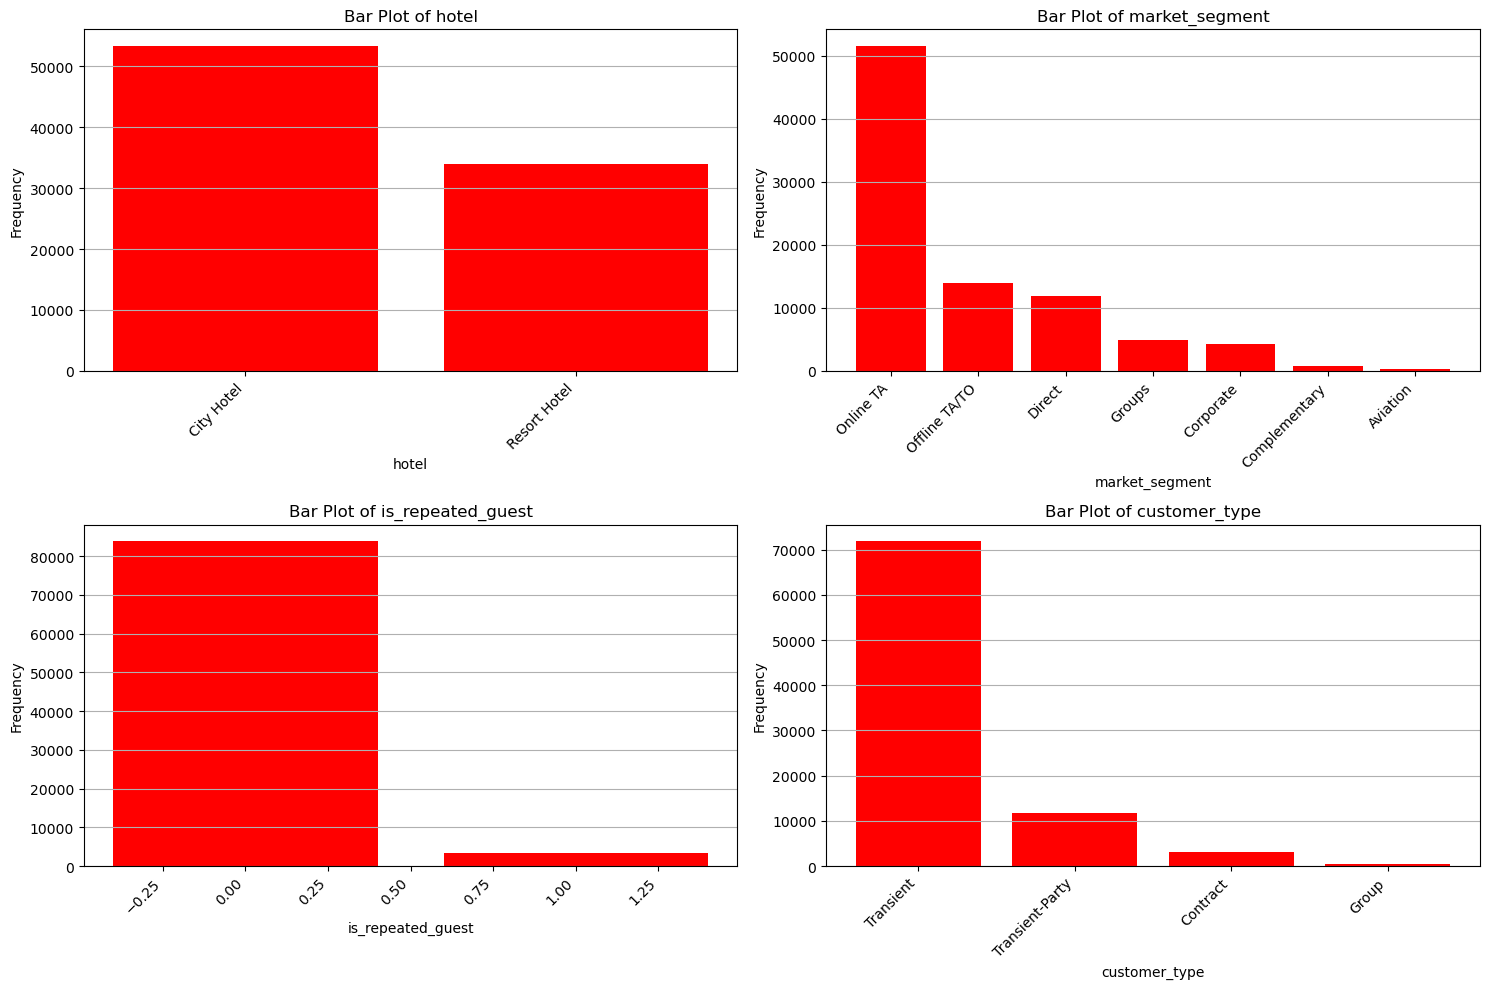

In [27]:
columns = ['hotel', 'market_segment', 'is_repeated_guest', 'customer_type']
plt.figure(figsize=(15, 10))
for i in range(len(columns)):
    column = columns[i]
    counts = hotel_data[column].value_counts()
    plt.subplot(2, 2, i+1)
    plt.bar(counts.index, counts.values, color='red')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

Conclusion: The distribution of hotels is fairly even. The majority of bookings fall under the “Transient” market segment.The majority of bookings are from non-repeat guests. The majority of bookings come from direct customers, followed by online travel agencies (OTA) and then offline travel agencies/tour operators (Offline TA/TO).

###### Create scatter plots or heatmaps to explore relationships between numerical columns.

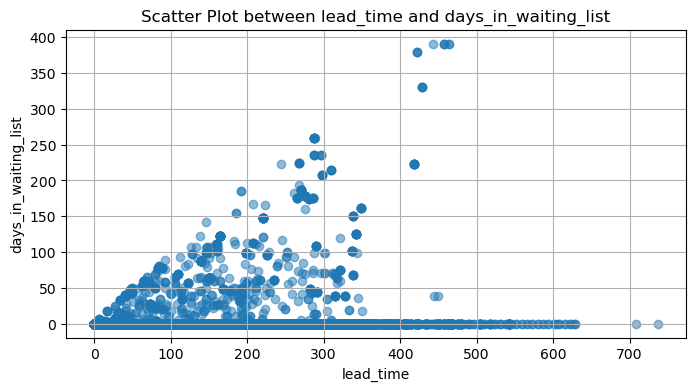

In [28]:
column1 = 'lead_time'
column2 = 'days_in_waiting_list'
plt.figure(figsize=(8, 4))
plt.scatter(hotel_data[column1], hotel_data[column2], alpha=0.5)
plt.title(f'Scatter Plot between {column1} and {column2}')
plt.xlabel(column1)
plt.ylabel(column2)
plt.grid(True)
plt.show()

Conclusion: Most Booking with lead_time between 400 and 500 seems to have higher wait time while lead_time above 500 have no wait time. Also lead_time between 0 to 400 seems to have lesser waiting time.

###### Use line plots to visualize trends over time for columns like arrival_date_year, arrival_date_month, arrival_date_week_number, and arrival_date_day_of_month.

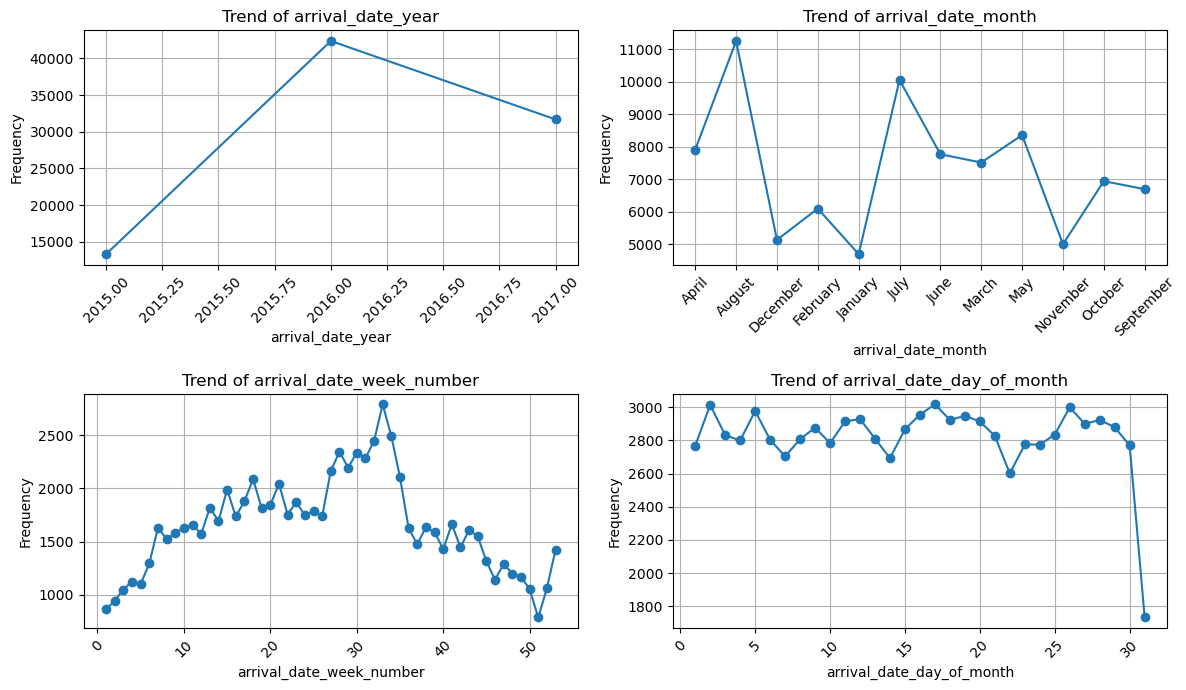

In [29]:
columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']
plt.figure(figsize=(12,7))
for i in range(len(columns)):
    col = columns[i]
    counts = hotel_data[col].value_counts().sort_index()
    plt.subplot(2, 2, i+1)
    plt.plot(counts.index, counts.values, marker='o', linestyle='-')
    plt.title(f'Trend of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

Conclusion: The frequency of arrivals appears to be relatively stable across years. The arrival date week number seems to follow a seasonal pattern, with higher frequencies in certain weeks throughout the year. The day of month also appears to follow similar pattern.

### 4. Correlation Analysis:
Correlation Analysis examines the strength and direction of the relationship between two or more variables. It is crucial for data-driven decision-making and predictive modeling.

###### Calculate the correlation matrix to identify potential relationships between numerical columns. (use pandas df.corr())

In [30]:
correlation_matrix = hotel_data[numerical_columns].corr()
correlation_matrix

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.234904,0.309983,0.140401,0.028560,-0.003645,0.005347,-0.078961,0.132924,0.023337,-0.086634,0.034133
stays_in_weekend_nights,0.234904,1.000000,0.555470,0.088190,0.028560,0.013667,-0.020641,-0.056663,-0.031846,0.038879,-0.042936,0.032493
stays_in_week_nights,0.309983,0.555470,1.000000,0.095470,0.030476,0.016008,-0.018789,-0.058520,0.001751,0.053187,-0.044317,0.037855
adults,0.140401,0.088190,0.095470,1.000000,0.023664,0.016629,-0.042116,-0.120948,-0.015530,0.248923,0.007754,0.112639
children,0.028560,0.028560,0.030476,0.023664,1.000000,0.017420,-0.019212,-0.029429,-0.020382,0.326304,0.036248,0.044611
babies,-0.003645,0.013667,0.016008,0.016629,0.017420,1.000000,-0.005397,-0.009196,-0.006825,0.023440,0.030882,0.094831
previous_cancellations,0.005347,-0.020641,-0.018789,-0.042116,-0.019212,-0.005397,1.000000,0.392063,0.003612,-0.050297,-0.003403,0.001870
previous_bookings_not_canceled,-0.078961,-0.056663,-0.058520,-0.120948,-0.029429,-0.009196,0.392063,1.000000,-0.006299,-0.085768,0.040870,0.027114
days_in_waiting_list,0.132924,-0.031846,0.001751,-0.015530,-0.020382,-0.006825,0.003612,-0.006299,1.000000,-0.033074,-0.016067,-0.049499
adr,0.023337,0.038879,0.053187,0.248923,0.326304,0.023440,-0.050297,-0.085768,-0.033074,1.000000,0.038983,0.137719


###### Visualize the correlation matrix using a heatmap.

In [31]:
import seaborn as sns

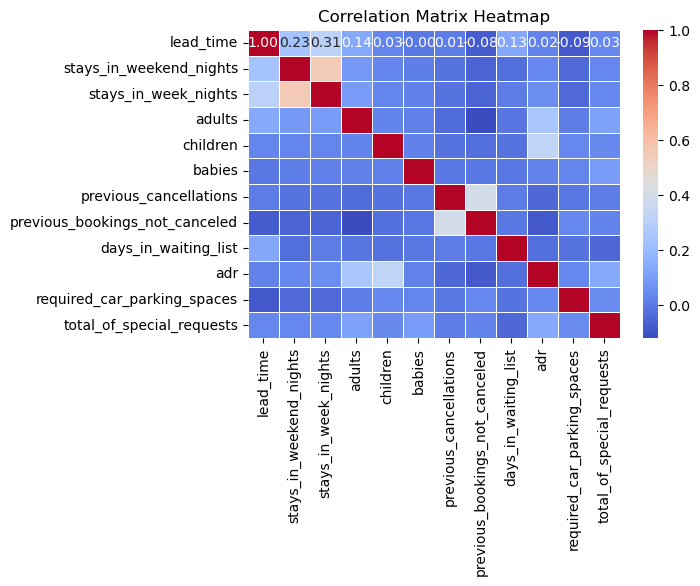

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Conclusion: Hotels with more weekend stays also tend to have more weekday stays. Bookings with more adults are more likely to have children. There's a trade-off between previous cancellations and previous bookings, and longer wait times are slightly linked to needing car parking.

### 5. Categorical Data Analysis:
Categorical data analysis helps in understanding the distribution and relationships of categorical variables, facilitating insights and informed decision-making.

###### Perform one-hot encoding or label encoding for categorical columns if required for further analysis.

In [33]:
label_enc = LabelEncoder()

In [34]:
hotel_data_encoded = hotel_data.copy()
label_enc = LabelEncoder()
for column in categorical_columns:
    hotel_data_encoded[column] = label_enc.fit_transform(hotel_data_encoded[column])

In [35]:
hotel_data_encoded

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2.0,...,0,0,0,0,2,0.00,0,0,1,01/07/2015
1,1,0,737,2015,July,27,1,0,0,2.0,...,0,0,0,0,2,0.00,0,0,1,01/07/2015
2,1,0,7,2015,July,27,1,0,1,1.0,...,0,0,0,0,2,75.00,0,0,1,02/07/2015
3,1,0,13,2015,July,27,1,0,1,1.0,...,0,221,0,0,2,75.00,0,0,1,02/07/2015
4,1,0,14,2015,July,27,1,0,2,2.0,...,0,174,0,0,2,98.00,0,1,1,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2.0,...,0,272,0,0,2,96.14,0,0,1,06/09/2017
119386,0,0,102,2017,August,35,31,2,5,3.0,...,0,9,0,0,2,225.43,0,2,1,07/09/2017
119387,0,0,34,2017,August,35,31,2,5,2.0,...,0,9,0,0,2,157.71,0,4,1,07/09/2017
119388,0,0,109,2017,August,35,31,2,5,2.0,...,0,78,0,0,2,104.40,0,0,1,07/09/2017


###### Create contingency tables or mosaic plots to analyze the relationship between categorical columns.

In [36]:
from statsmodels.graphics.mosaicplot import mosaic

In [37]:
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        print(f"\nContingency Table between {categorical_columns[i]} and {categorical_columns[j]}:")
        contingency_table = pd.crosstab(hotel_data[categorical_columns[i]], hotel_data[categorical_columns[j]])
        print(contingency_table)


Contingency Table between hotel and country:
country       ABW  AGO  AIA  ALB  AND  ARE  ARG  ARM  ASM  ATA  ...  UMI  URY  \
hotel                                                           ...             
City Hotel      2  319    1    8    2   37  147    6    1    2  ...    1   22   
Resort Hotel    0   23    0    3    5   11   56    2    0    0  ...    0    8   

country        USA  UZB  VEN  VGB  VNM  ZAF  ZMB  ZWE  
hotel                                                  
City Hotel    1417    3   18    1    6   60    1    2  
Resort Hotel   458    1    3    0    2   18    1    2  

[2 rows x 177 columns]

Contingency Table between hotel and market_segment:
market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
hotel                                                                
City Hotel           227            513       2227    5558    2638   
Resort Hotel           0            189       1979    6239    2305   

market_segment  Offline TA/TO  Online TA  
hote

reservation_status  Canceled  Check-Out  No-Show
country                                         
ABW                        0          2        0
AGO                      139        149       54
AIA                        0          1        0
ALB                        2          9        0
AND                        5          2        0
...                      ...        ...      ...
VGB                        1          0        0
VNM                        2          6        0
ZAF                       24         49        5
ZMB                        1          1        0
ZWE                        2          2        0

[177 rows x 3 columns]

Contingency Table between market_segment and distribution_channel:
distribution_channel  Corporate  Direct  GDS  TA/TO  Undefined
market_segment                                                
Aviation                    217       0    0     10          0
Complementary                81     546    0     75          0
Corporate          

deposit_type          No Deposit  Non Refund  Refundable
distribution_channel                                    
Corporate                   4982          90           3
Direct                     12866          53          61
GDS                          181           0           0
TA/TO                      68195         895          43
Undefined                      1           0           0

Contingency Table between distribution_channel and agent:
agent                 0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    \
distribution_channel                                                           
Corporate              4370      0      0      0      0      0      1      0   
Direct                 6615      0      1      0      0      3      3      0   
GDS                       2      0      0      0      0      0      0      0   
TA/TO                  1190   1234    128    363     18    213   1112   3300   
Undefined                 1      0      0      0      0      0

deposit_type        No Deposit  Non Refund  Refundable
reserved_room_type                                    
A                        55482         964          90
B                          992           3           0
C                          909           1           5
D                        17367          22           7
E                         5998          44           4
F                         2820           1           1
G                         2051           1           0
H                          594           2           0
L                            6           0           0
P                            6           0           0

Contingency Table between reserved_room_type and agent:
agent               0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    \
reserved_room_type                                                           
A                    8824   1222     74    327     18    113    966   2225   
B                     101      5      0      3   

customer_type  Contract  Group  Transient  Transient-Party
deposit_type                                              
No Deposit         3107    539      71096            11483
Non Refund           28      0        859              151
Refundable            2      5         16               84

Contingency Table between deposit_type and reservation_status:
reservation_status  Canceled  Check-Out  No-Show
deposit_type                                    
No Deposit             22006      63212     1007
Non Refund               977         55        6
Refundable                25         81        1

Contingency Table between agent and company:
company  0.0    6.0    8.0    9.0    10.0   11.0   12.0   14.0   16.0   18.0   \
agent                                                                           
0.0       7112      1      1     26      1      1     13      7      5      1   
1.0       1234      0      0      0      0      0      0      0      0      0   
2.0        129      0     

### 6. Time Series Analysis:
Time Series Analysis involves examining data points collected or recorded at specific time intervals to identify trends, patterns, and seasonal variations. It is essential for understanding temporal data and making accurate predictions for future trends.

###### Analyze the arrival_date_year, arrival_date_month, arrival_date_week_number, and arrival_date_day_of_month columns to identify seasonality or trends in bookings over time.

<Figure size 500x200 with 0 Axes>

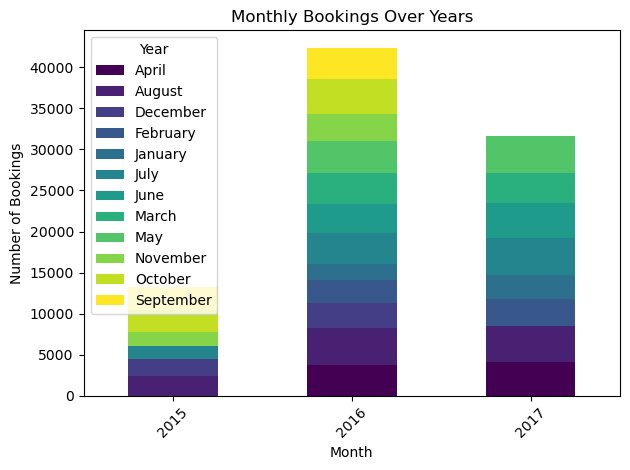

In [38]:
plt.figure(figsize=(5, 2))
monthly_bookings = hotel_data.groupby(['arrival_date_year', 'arrival_date_month']).size().unstack()
monthly_bookings.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Monthly Bookings Over Years')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Conclusion: September seems to be the month with highest number of booking in 2015 and 2016 while March was the month with most bookings in 2017. April appears to be the month with least bookings.

###### Create time series plots or decompose the time series to understand the trend, seasonality, and residuals.

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
hotel_data_copy = hotel_data.copy()
hotel_data_copy['timestamp'] = pd.to_datetime(hotel_data_copy['arrival_date_year'].astype(str) + '-' + hotel_data_copy['arrival_date_month'].astype(str) + '-' + hotel_data_copy['arrival_date_day_of_month'].astype(str))

In [41]:
time_series_data = hotel_data_copy['timestamp'].value_counts().sort_index()

In [42]:
time_series_data = time_series_data.sort_index()
results = seasonal_decompose(time_series_data, model='additive', period=30)

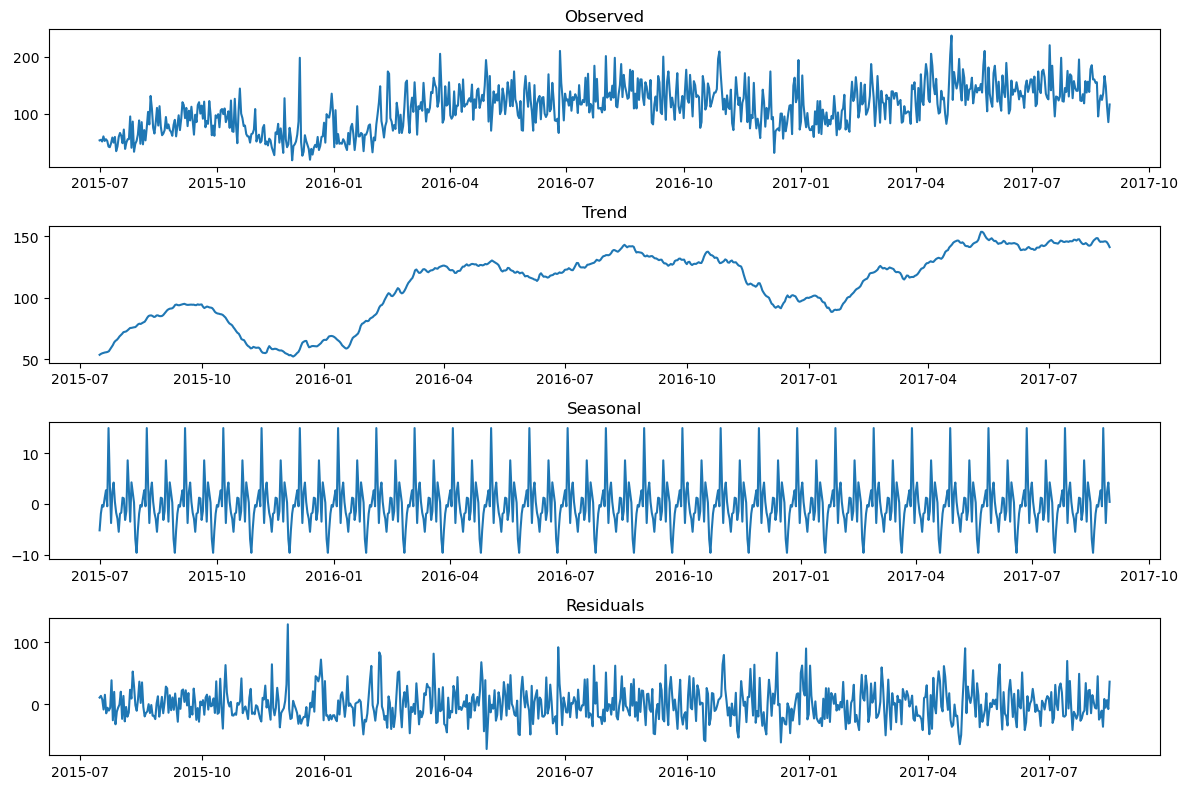

In [43]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(results.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(results.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(results.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(results.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

### 7. Feature Engineering:
Feature Engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. It is is crucial for enhancing the performance of machine learning models by making the data more informative and suitable for the learning algorithms.

###### Create new features based on existing columns, such as calculating the duration of stay from stays_in_weekend_nights and stays_in_week_nights.

In [44]:
hotel_data_copy = hotel_data.copy()
hotel_data_copy['duration_of_stay'] = hotel_data_copy['stays_in_weekend_nights'] + hotel_data_copy['stays_in_week_nights']
hotel_data_copy['duration_of_stay']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: duration_of_stay, Length: 87370, dtype: int64

###### Derive new features from date columns like arrival_date_year, arrival_date_month, arrival_date_week_number, and arrival_date_day_of_month (e.g., season, month name, day of the week).

In [45]:
import calendar

In [46]:
hotel_data_copy['arrival_date'] = pd.to_datetime(hotel_data_copy['arrival_date_year'].astype(str) + '-' + hotel_data_copy['arrival_date_month'].astype(str) + '-' + hotel_data_copy['arrival_date_day_of_month'].astype(str))

In [47]:
hotel_data_copy['season'] = hotel_data_copy['arrival_date'].dt.quarter
hotel_data_copy['month_name'] = hotel_data_copy['arrival_date'].dt.month_name()
hotel_data_copy['day_of_week'] = hotel_data_copy['arrival_date'].dt.day_name()

In [48]:
print(hotel_data_copy[['arrival_date', 'season', 'month_name', 'day_of_week']])

       arrival_date  season month_name day_of_week
0        2015-07-01       3       July   Wednesday
1        2015-07-01       3       July   Wednesday
2        2015-07-01       3       July   Wednesday
3        2015-07-01       3       July   Wednesday
4        2015-07-01       3       July   Wednesday
...             ...     ...        ...         ...
119385   2017-08-30       3     August   Wednesday
119386   2017-08-31       3     August    Thursday
119387   2017-08-31       3     August    Thursday
119388   2017-08-31       3     August    Thursday
119389   2017-08-29       3     August     Tuesday

[87370 rows x 4 columns]


### 8. Handling Datetime Columns:
Handling Datetime Columns involves processing and extracting useful information from date and time data. It is is crucial for temporal data analysis and can significantly enhance the performance and interpretability of time-based models.

###### Convert the reservation_status_date column to datetime format if necessary.

In [49]:
hotel_data_copy['reservation_status_date'] = pd.to_datetime(hotel_data_copy['reservation_status_date'], errors='coerce')
hotel_data_copy['reservation_status_date']

0        2015-01-07
1        2015-01-07
2        2015-02-07
3        2015-02-07
4        2015-03-07
            ...    
119385   2017-06-09
119386   2017-07-09
119387   2017-07-09
119388   2017-07-09
119389   2017-07-09
Name: reservation_status_date, Length: 87370, dtype: datetime64[ns]

###### Extract additional features from the datetime column, such as day of the week, month, or hour.

In [50]:
hotel_data_copy['month'] = hotel_data_copy['arrival_date'].dt.month_name()
hotel_data_copy['day_of_week'] = hotel_data_copy['arrival_date'].dt.day_name()
print(hotel_data_copy[['month', 'day_of_week']])

         month day_of_week
0         July   Wednesday
1         July   Wednesday
2         July   Wednesday
3         July   Wednesday
4         July   Wednesday
...        ...         ...
119385  August   Wednesday
119386  August    Thursday
119387  August    Thursday
119388  August    Thursday
119389  August     Tuesday

[87370 rows x 2 columns]
